In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## import the yfinance module that installed previously
import yfinance as yf

In [4]:
##create start and end variable dates to fetch stock data
start = '2010-01-01'
end = '2020-12-31'

In [5]:
# create a dataframe that will store the stock data
df = yf.download('AAPL',start=start,end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383554,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383554,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [8]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [9]:
## since we are going to calculate moving averages , we donot need date as our index
##because date is uneven
## hence removed it

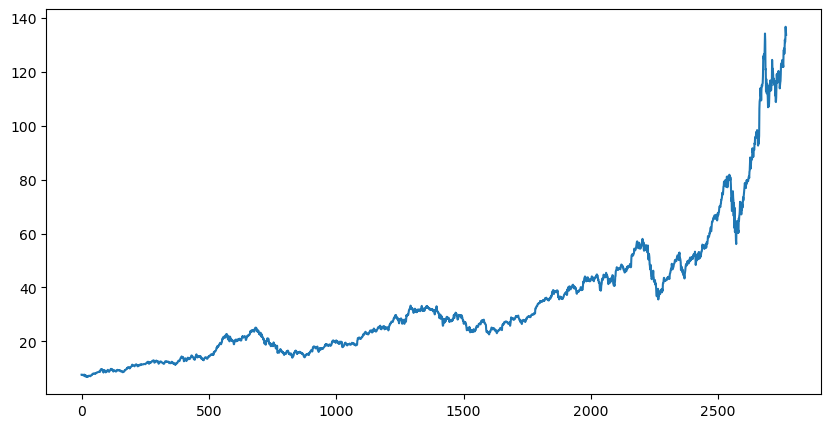

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)

In [11]:
## we will use rolling function to calculate moving averages
MA100 = df.Close.rolling(100).mean()
MA100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

In [12]:
## we can see it is calcualting current average form past 100 records mean
## hence there is not moving average for intiall 100 records

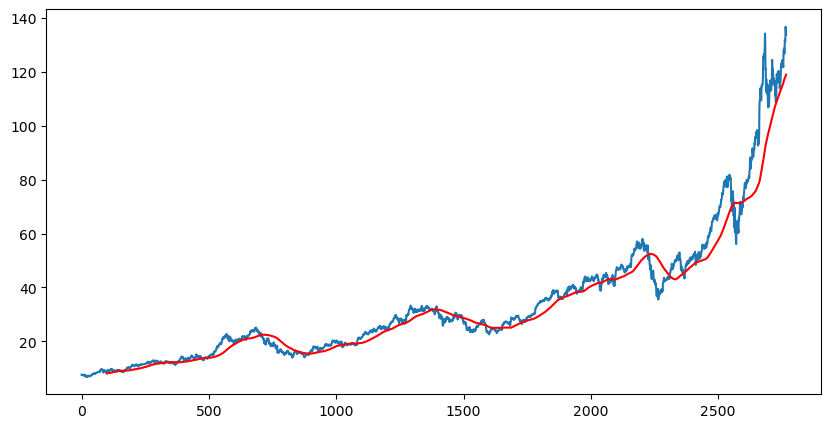

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(MA100,'r')

In [14]:
## moving average based on past 200 data points
MA200 = df.Close.rolling(200).mean()
MA200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

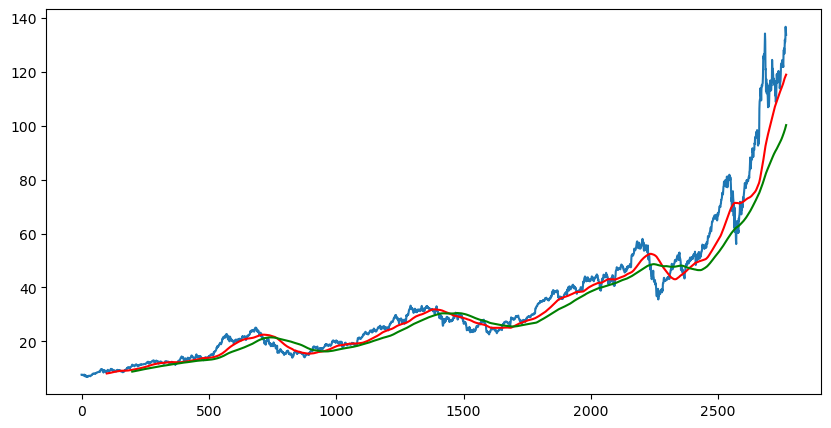

In [15]:
plt.figure(figsize = (10,5))
plt.plot(df.Close)
plt.plot(MA100,'r')
plt.plot(MA200,'g')

In [16]:
## split data into training and testing data

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [17]:
data_train.shape
data_test.shape

(831, 1)

In [18]:
data_train.shape

(1937, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_scaled = scaler.fit_transform(data_train)

In [23]:
data_train_scaled

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [25]:
data_train_scaled.shape

(1937, 1)

In [26]:
x_train = []
y_train = []

for i in range(100,data_train_scaled.shape[0]):
    x_train.append(data_train_scaled[i-100 : i])
    y_train.append(data_train_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [30]:
## ML model

In [31]:
from keras.layers import Dense, Dropoutt, LSTM 

In [32]:
from keras.models import Sequential

In [33]:
model = Sequential()

#layer 1
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
          
#layer 2
          
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

#layer 3

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

#layer 4

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

#final Dense layer to return predicted values

model.add(Dense(units=1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
58/58 [==============================] - 18s 236ms/step - loss: 0.0351
Epoch 2/50
58/58 [==============================] - 14s 243ms/step - loss: 0.0075
Epoch 3/50
58/58 [==============================] - 15s 253ms/step - loss: 0.0072
Epoch 4/50
58/58 [==============================] - 15s 254ms/step - loss: 0.0070
Epoch 5/50
58/58 [==============================] - 15s 253ms/step - loss: 0.0057
Epoch 6/50
58/58 [==============================] - 15s 257ms/step - loss: 0.0061
Epoch 7/50
58/58 [==============================] - 14s 249ms/step - loss: 0.0051
Epoch 8/50
58/58 [==============================] - 14s 243ms/step - loss: 0.0056
Epoch 9/50
58/58 [==============================] - 14s 241ms/step - loss: 0.0051
Epoch 10/50
58/58 [==============================] - 13s 229ms/step - loss: 0.0049
Epoch 11/50
58/58 [==============================] - 13s 228ms/step - loss: 0.0051
Epoch 12/50
58/58 [==============================] - 13s 229ms/step - loss: 0.0044
Epoch 13/50
5

In [37]:
model.save('keras_model.h5')

C:\ML\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
data_test.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [39]:
past_100_days = data_train.tail(100)

In [40]:
final_df = past_100_days.append(data_test, ignore_index=True)

C:\Users\Ram kumar\AppData\Local\Temp\ipykernel_3484\1626534528.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True)


In [41]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [43]:
input_data.shape

(931, 1)

In [61]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [62]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [63]:
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [64]:
# making predictions

In [65]:
y_predicted = model.predict(x_test)

26/26 [==============================] - 4s 135ms/step


In [66]:
y_predicted.shape

(831, 1)

In [67]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [68]:
y_predicted

array([[0.11472005],
       [0.11498903],
       [0.11523174],
       [0.1154457 ],
       [0.11563069],
       [0.11578631],
       [0.11591095],
       [0.11599973],
       [0.11604795],
       [0.11605249],
       [0.11601377],
       [0.11593613],
       [0.11582534],
       [0.11568783],
       [0.11553004],
       [0.11535789],
       [0.11517635],
       [0.11499062],
       [0.11480597],
       [0.11462709],
       [0.11445732],
       [0.11429995],
       [0.1141569 ],
       [0.11402956],
       [0.11392207],
       [0.11384073],
       [0.11378935],
       [0.11376458],
       [0.11375844],
       [0.11376372],
       [0.11377522],
       [0.11378941],
       [0.11380383],
       [0.11382434],
       [0.11387067],
       [0.11397156],
       [0.11414754],
       [0.11440784],
       [0.11476666],
       [0.11524165],
       [0.11584742],
       [0.11659095],
       [0.11747456],
       [0.11848822],
       [0.1196118 ],
       [0.12081338],
       [0.12204546],
       [0.123

In [69]:
scaler.scale_

array([0.00988704])

In [70]:
scale_factor = 1/0.00988704

In [71]:
y_test = y_test * scale_factor
y_predicted = y_predicted * scale_factor

In [72]:
y_test

array([  4.36499803,   4.02249924,   4.42250078,   4.11999909,
         4.13499848,   3.47000135,   2.79999935,   2.42499933,
         2.09000023,   2.73749934,   3.00999844,   2.77249919,
         2.98249828,   2.90499889,   3.07249844,   2.82249843,
         3.29999936,   3.27750028,   3.41249861,   3.427498  ,
         3.59000029,   3.45249952,   3.70000091,   4.42250078,
         4.56999987,   4.39249819,   3.44749845,   3.51499953,
         3.49499907,   3.72750106,   3.55500044,   3.80500045,
         5.21500035,   6.13249993,   6.71249797,   6.17499948,
         6.47999979,   7.57749968,   8.0149997 ,   8.15499909,
         8.51250109,   8.42250094,   8.11999925,   7.945     ,
         7.28749876,   6.72250011,   7.2275012 ,   6.98999813,
         6.94749859,   7.73749954,   8.19250139,   8.19500001,
         7.97499878,   7.72000152,   6.82249859,   7.4150012 ,
         7.21500043,   6.90250042,   6.8624995 ,   6.70499828,
         6.78250148,   6.79499843,   7.61999923,   7.37

In [73]:
y_predicted

array([[11.603073 ],
       [11.630279 ],
       [11.654827 ],
       [11.676468 ],
       [11.695178 ],
       [11.710918 ],
       [11.723524 ],
       [11.732504 ],
       [11.737381 ],
       [11.737841 ],
       [11.733923 ],
       [11.726071 ],
       [11.714866 ],
       [11.700957 ],
       [11.6849985],
       [11.667586 ],
       [11.649225 ],
       [11.63044  ],
       [11.611764 ],
       [11.593672 ],
       [11.576501 ],
       [11.560584 ],
       [11.546116 ],
       [11.533236 ],
       [11.522365 ],
       [11.514137 ],
       [11.508941 ],
       [11.506435 ],
       [11.505815 ],
       [11.506348 ],
       [11.507512 ],
       [11.508946 ],
       [11.510406 ],
       [11.512479 ],
       [11.517165 ],
       [11.5273695],
       [11.545169 ],
       [11.571496 ],
       [11.607788 ],
       [11.655829 ],
       [11.717099 ],
       [11.792301 ],
       [11.881671 ],
       [11.984196 ],
       [12.097837 ],
       [12.219369 ],
       [12.343984 ],
       [12.46

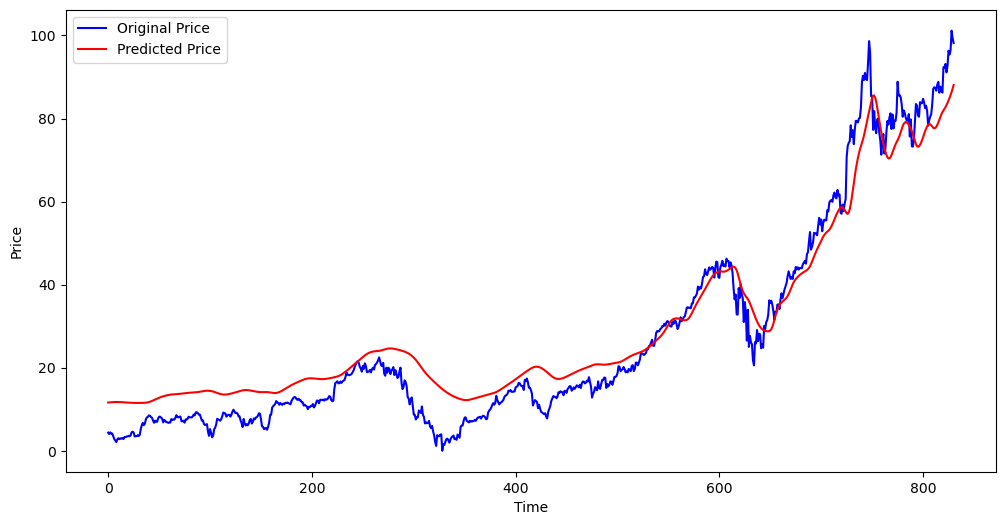

In [76]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()